# Introduction to Knet

# Linear regression Example

In [1]:
function predict(w, x)
    return w[1]*x .+ w[2]
end

predict (generic function with 1 method)

In [2]:
function loss(w, x, y)
    return sum((y - predict(w,x)).*(y - predict(w,x)))/length(y)
end

loss (generic function with 1 method)

In [3]:
using Knet
lossgradient = grad(loss)

INFO: No GPU found, Knet using the CPU


(::gradfun) (generic function with 1 method)

### Load the data

In [4]:
X = Array(1:50);

In [5]:
y = [(x + sin(x[1] + rand(1)[1]/100))/2 for x in X];

In [6]:
length(X), length(y)

(50,50)

In [7]:
data = []
for i in 1:length(X)
    push!(data,(X[i], y[i][1]))
end

In [8]:
using PyPlot

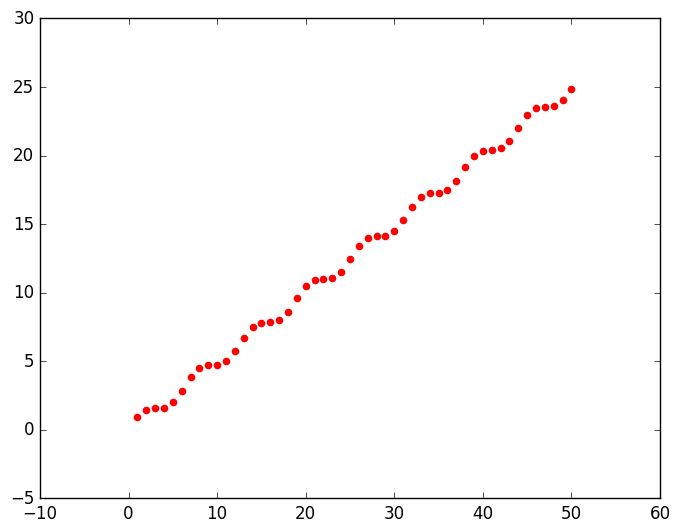

PyObject <matplotlib.collections.PathCollection object at 0x31ad7d518>

  likely near /Users/david/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/david/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/david/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/david/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/david/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/david/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/david/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/david/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/david/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/david/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/david/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/david/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/david/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/david/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /Users/david/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/david/.julia/v0.5/PyCall/src/PyCall.jl
  li

In [9]:
scatter(X, y, color="red", linewidth=1.0)

## Train the model using full batch gradient descent

In [10]:
function train(w, X, y ; lr=0.01, n_epochs=10)
    
    n_samples = length(y)
    loss_evolution = zeros(n_epochs)
    
    for epoch in 1:n_epochs
        loss_evolution[epoch] = loss(w, X, y)
        dw = lossgradient(w, X, y)
        
        for i in 1:length(w)
            w[i] = w[i] - lr * dw[i];
        end
    end
    
    return w, loss_evolution
end

train (generic function with 1 method)

In [11]:
w = Array([0.001, 0.])

2-element Array{Float64,1}:
 0.001
 0.0  

In [12]:
w, loss_evol = train(w, X, y ; lr=0.0001, n_epochs=100);

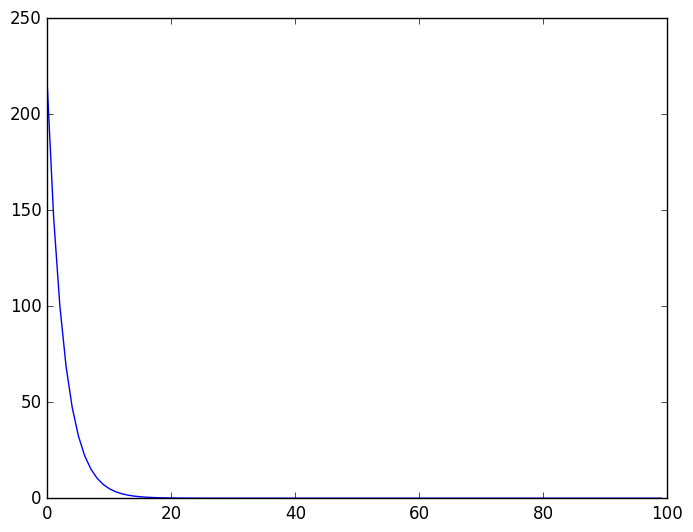

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31aaad080>

In [13]:
plot(loss_evol)

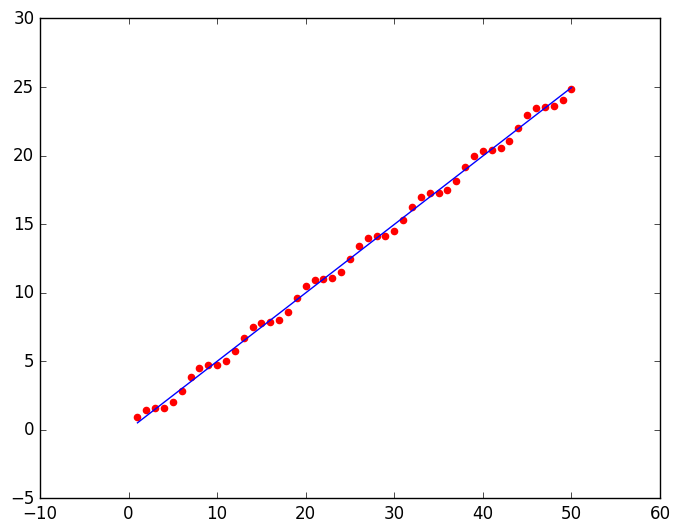

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31ab5b320>

In [14]:
scatter(X, y, color="red", linewidth=1.0)
plot(X, predict(w,X) , color="blue", linewidth=1.0)

# Linear Regression as type

In [ ]:
type LinearRegressor
    n_features::Int32
    w::Array{Float32}
    b::Float32
    trained::false
end

In [ ]:
linear_reg = LinearRegressor([2],3)

In [ ]:
linear_reg.